In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
pd.read_excel?

In [4]:
data1 = pd.read_excel("Case_study_data.xlsx",sheet= 0,parse_dates=True)

C:\Users\ASHISH\Anaconda3\lib\site-packages\pandas\io\excel.py:520: UserWarning: The 'parse_dates=True' keyword of read_excel was provided without an 'index_col' keyword value.
  warn("The 'parse_dates=True' keyword of read_excel was provided"


In [5]:
data2 = pd.read_excel("Case_study_data.xlsx",sheet= 1,parse_dates=True)

C:\Users\ASHISH\Anaconda3\lib\site-packages\pandas\io\excel.py:520: UserWarning: The 'parse_dates=True' keyword of read_excel was provided without an 'index_col' keyword value.
  warn("The 'parse_dates=True' keyword of read_excel was provided"


In [6]:
data = (data1.append(data2,ignore_index=True))

In [49]:
data.head()

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,UPGRADE_DATE,SERVICE_ PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,COMPANY_SOURCE_NAME,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-11112345,Active,2001-11-27,2003-12-14,NaN,HN9000,Vars,Indirect,UNKNOWN,HNS Customers,...,Broadband Remote,0,HN7000 Upgrade,2.0,1-5-1943,69,0,1.0,0.0,N
1,AMR-14837287,Active,2003-05-02,2006-08-08,Pro,HN7000S,Sales Agents,Indirect,NCC,HNS Customers,...,Spaceway,0,Retail,2.0,28-12-1969,43,4,1.0,0.0,N
2,AMR-14837803,Active,2001-01-28,2004-03-17,Power150,HN9000,Call Center,Indirect,NCC,HNS Customers,...,Broadband Remote,0,National Sales,2.0,20-7-1954,58,4,1.0,0.0,N
3,AMR-14837821,Active,2001-11-20,2005-03-27,Power150,DW6000,Sales Agents,Direct,NaN,HNS Customers,...,Spaceway,0,Direct,NaN,10-5-1990,22,6,1.0,1.0,NaN
4,AMR-14839297,Active,2002-02-27,2004-06-14,Home,HN7000S,Call Center,Indirect,TAG,HNS Customers,...,Broadband Remote,0,DW6000 Upgrade,1.0,11-5-1976,36,7,0.0,0.0,NaN


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 29 columns):
SITE_ACCOUNT_NUMBER          19996 non-null object
ACCOUNT_STATUS               19996 non-null object
FIRST_COMMUNICATION_DATE     19978 non-null datetime64[ns]
UPGRADE_DATE                 19978 non-null datetime64[ns]
SERVICE_ PLAN                17520 non-null object
MODEL                        18646 non-null object
SALES_CHANNEL                14186 non-null object
DIRECT_INDIRECT_CHANNEL      19908 non-null object
SALES_SOURCE                 18612 non-null object
COMPANY_SOURCE_NAME          19976 non-null object
FIRST_NAME                   19996 non-null object
LAST_NAME                    19996 non-null object
ADDRESS                      19890 non-null object
CITY                         19996 non-null object
STATE                        19954 non-null object
ZIPCODE                      19954 non-null object
EMAIL_ADDRESS                19958 non-null object
FEEDBACK

In [15]:
pandas_profiling.ProfileReport(data)

Number of variables,29
Number of observations,19998
Total Missing (%),5.3%
Total size in memory,2.6 MiB
Average record size in memory,136.0 B
Numeric,3
Categorical,24
Boolean,0
Date,2
Text (Unique),0
Rejected,0


In [7]:
data.ADDRESS = data.ADDRESS.astype(str)
data.AGE = pd.to_numeric(data.AGE,errors='coerce')   # error if convert to int
data.CITY = data.CITY.astype(str)
#data.DATE_OF_BIRTH = data.DATE_OF_BIRTH.ASTYPE(datetime64[ns])
data.EMAIL_ADDRESS = data.EMAIL_ADDRESS.astype(str)
#data.FIRST_COMMUNICATION_DATE
data.FIRST_NAME = data.FIRST_NAME.astype(str)
data.GENDER =data.GENDER.astype(object)
data.INCOME = pd.to_numeric(data.INCOME,errors='coerce')
data.LAST_NAME = data.LAST_NAME.astype(str)
data.MARITAL_STATUS = data.MARITAL_STATUS.astype(object)
data.MOST_RECENT_SALES_CHANNEL = data.MOST_RECENT_SALES_CHANNEL.astype(str)
data.PRESENCE_OF_CHILDREN = data.PRESENCE_OF_CHILDREN.astype(object)
data.SALES_SOURCE = data.SALES_SOURCE.astype(str)
data.SATELLITE = data.SATELLITE.astype(str)
data.SITE_ACCOUNT_NUMBER = data.SITE_ACCOUNT_NUMBER.astype(str)
data.STATE = data.STATE.astype(str)
data.ZIPCODE = data.ZIPCODE.astype(str)

In [65]:
#data.AGE = data.AGE.astype(int)

In [15]:
pd.to_numeric?

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 29 columns):
SITE_ACCOUNT_NUMBER          19998 non-null object
ACCOUNT_STATUS               19996 non-null object
FIRST_COMMUNICATION_DATE     19978 non-null datetime64[ns]
UPGRADE_DATE                 19978 non-null datetime64[ns]
SERVICE_ PLAN                17520 non-null object
MODEL                        18646 non-null object
SALES_CHANNEL                14186 non-null object
DIRECT_INDIRECT_CHANNEL      19908 non-null object
SALES_SOURCE                 19998 non-null object
COMPANY_SOURCE_NAME          19976 non-null object
FIRST_NAME                   19998 non-null object
LAST_NAME                    19998 non-null object
ADDRESS                      19998 non-null object
CITY                         19998 non-null object
STATE                        19998 non-null object
ZIPCODE                      19998 non-null object
EMAIL_ADDRESS                19998 non-null object
FEEDBACK

In [8]:
data['DATE_OF_BIRTH']=data.DATE_OF_BIRTH.replace('.',np.nan)
data

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,UPGRADE_DATE,SERVICE_ PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,COMPANY_SOURCE_NAME,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-11112345,Active,2001-11-27,2003-12-14,NaN,HN9000,Vars,Indirect,UNKNOWN,HNS Customers,...,Broadband Remote,0,HN7000 Upgrade,2,1-5-1943,69.0,0.0,1,0,N
1,AMR-14837287,Active,2003-05-02,2006-08-08,Pro,HN7000S,Sales Agents,Indirect,NCC,HNS Customers,...,Spaceway,0,Retail,2,28-12-1969,43.0,4.0,1,0,N
2,AMR-14837803,Active,2001-01-28,2004-03-17,Power150,HN9000,Call Center,Indirect,NCC,HNS Customers,...,Broadband Remote,0,National Sales,2,20-7-1954,58.0,4.0,1,0,N
3,AMR-14837821,Active,2001-11-20,2005-03-27,Power150,DW6000,Sales Agents,Direct,nan,HNS Customers,...,Spaceway,0,Direct,NaN,10-5-1990,22.0,6.0,1,1,NaN
4,AMR-14839297,Active,2002-02-27,2004-06-14,Home,HN7000S,Call Center,Indirect,TAG,HNS Customers,...,Broadband Remote,0,DW6000 Upgrade,1,11-5-1976,36.0,7.0,0,0,NaN
5,AMR-14840229,Active,2002-02-05,2005-07-13,Pro,HN9000,Sales Agents,Indirect,UNKNOWN,HNS Customers,...,Broadband Remote,0,HN9000 Upgrade,2,19-1-1961,51.0,7.0,1,0,NaN
6,AMR-14841940,Active,2001-11-21,2003-06-05,Power150,HN7000S,NaN,Indirect,ValueElectronics,HNS Customers,...,Broadband Remote,0,Retail,1,2-12-1956,56.0,3.0,1,0,NaN
7,AMR-14842501,Active,2001-07-20,2004-01-25,Power150,HN7000S,Vars,Indirect,TAG,HNS Customers,...,Broadband Remote,0,Retail,1,26-10-1955,57.0,7.0,0,NaN,Y
8,AMR-14847927,Active,2002-04-13,2006-02-23,Home,DW6000,Vars,Indirect,nan,HNS Customers,...,Broadband Remote,0,HN9000 Upgrade,2,8-6-1970,42.0,4.0,2,0,NaN
9,AMR-14859335,Active,2002-04-09,2004-09-06,Basic_Ltd,HN7000S,Sales Agents,Indirect,Hughes Web Order,HNS Customers,...,Broadband Remote,0,HN7000 Upgrade,2,15-11-1978,34.0,4.0,2,1,N


In [7]:
#data.DATE_OF_BIRTH.dropna(inplace = True,axis=0)
#data

In [47]:
len(data.DATE_OF_BIRTH)

19998

In [9]:
data.DATE_OF_BIRTH = pd.to_datetime(data.DATE_OF_BIRTH)

In [8]:
data.DATE_OF_BIRTH.head()

0   1943-01-05
1   1969-12-28
2   1954-07-20
3   1990-10-05
4   1976-11-05
Name: DATE_OF_BIRTH, dtype: datetime64[ns]

In [ ]:
#datetime.datetime.strptime(data.DATE_OF_BIRTH, format =%d-%m_%Y).strftime('%d/%m/%Y')

In [10]:
data.drop(columns=['COMPUTER_OWNER','FEEDBACK'], axis=1, inplace=True)

In [11]:
data.drop(columns=['SITE_ACCOUNT_NUMBER'], axis=1, inplace=True)

In [12]:
data.drop(columns=['FIRST_NAME', 'LAST_NAME', 'ADDRESS','CITY', 'STATE', 'ZIPCODE'], axis=1, inplace=True)

In [13]:
data.drop(columns=['MOST_RECENT_SALES_CHANNEL','EMAIL_ADDRESS','SATELLITE','SALES_SOURCE'], axis=1, inplace=True)

In [14]:
numeric_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['AGE', 'INCOME']
['ACCOUNT_STATUS', 'SERVICE_ PLAN', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'COMPANY_SOURCE_NAME', 'SITE_TYPE_DESC', 'WARRANTY_NAME', 'GENDER', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN']


In [97]:
data_num=data[numeric_var_names]
data_num.head(5)

,AGE,INCOME
0,69.0,0.0
1,43.0,4.0
2,58.0,4.0
3,22.0,6.0
4,36.0,7.0


In [14]:
data_num.isna().sum()

AGE        714
INCOME    1622
dtype: int64

In [98]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.95))
    x = x.clip_lower(x.quantile(0.05))
    return x

data_num=data_num.apply(outlier_capping)

In [99]:
#Handling missings
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

data_num=data_num.apply(lambda x: Missing_imputation(x))

In [100]:
data_num.isna().sum()

AGE       0
INCOME    0
dtype: int64

In [101]:
data_cat = data[cat_var_names]
data_cat.head()

,ACCOUNT_STATUS,SERVICE_ PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,COMPANY_SOURCE_NAME,SITE_TYPE_DESC,WARRANTY_NAME,GENDER,MARITAL_STATUS,PRESENCE_OF_CHILDREN
0,Active,NaN,HN9000,Vars,Indirect,HNS Customers,Broadband Remote,0,2,1,0
1,Active,Pro,HN7000S,Sales Agents,Indirect,HNS Customers,Spaceway,0,2,1,0
2,Active,Power150,HN9000,Call Center,Indirect,HNS Customers,Broadband Remote,0,2,1,0
3,Active,Power150,DW6000,Sales Agents,Direct,HNS Customers,Spaceway,0,NaN,1,1
4,Active,Home,HN7000S,Call Center,Indirect,HNS Customers,Broadband Remote,0,1,0,0


In [18]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 11 columns):
ACCOUNT_STATUS             19996 non-null object
SERVICE_ PLAN              17520 non-null object
MODEL                      18646 non-null object
SALES_CHANNEL              14186 non-null object
DIRECT_INDIRECT_CHANNEL    19908 non-null object
COMPANY_SOURCE_NAME        19976 non-null object
SITE_TYPE_DESC             19976 non-null object
WARRANTY_NAME              18084 non-null object
GENDER                     17456 non-null object
MARITAL_STATUS             19360 non-null object
PRESENCE_OF_CHILDREN       17368 non-null object
dtypes: object(11)
memory usage: 859.3+ KB


In [16]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=data_cat.apply(cat_summary)

In [17]:
cat_summary

,ACCOUNT_STATUS,SERVICE_ PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,COMPANY_SOURCE_NAME,SITE_TYPE_DESC,WARRANTY_NAME,GENDER,MARITAL_STATUS,PRESENCE_OF_CHILDREN
N,19996,17520,18646,14186,19908,19976,19976,18084,17456,19360,17368
NMISS,2,2478,1352,5812,90,22,22,1914,2542,638,2630
ColumnsNames,Active 19970 Inactive 26 Name: ACCO...,Proplus 2544 Basic_Ltd 2536 Basic ...,HN7000S 8592 HN9000 3970 UNK 195...,Sales Agents 2908 Retail/others 2890 Va...,Indirect 15252 Direct 4638 0 ...,HNS Customers 19976 Name: COMPANY_SOURCE_NA...,Broadband Remote 15510 Spaceway ...,0 ...,"1.0 9530 2.0 7926 Name: GENDER, dtype: i...",0.0 9308 1.0 9020 2.0 1032 Name: MARI...,0.0 13286 1.0 4082 Name: PRESENCE_OF_CH...


In [102]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    #col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [103]:
#for c_feature in categorical_features
data_cat_new = data_cat
for c_feature in cat_var_names:
    data_cat_new[c_feature] = data_cat_new[c_feature].astype('category')
    data_cat_new = create_dummies(data_cat_new , c_feature )

C:\Users\ASHISH\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [56]:
 data_cat_new.head()

,ACCOUNT_STATUS_Inactive,SERVICE_ PLAN_Basic_Ltd,SERVICE_ PLAN_Elite,SERVICE_ PLAN_Home,SERVICE_ PLAN_Power150,SERVICE_ PLAN_Pro,SERVICE_ PLAN_Proplus,MODEL_DW4020,MODEL_DW6000,MODEL_DW7000,...,WARRANTY_NAME_EXPRESS REPAIR HOME,WARRANTY_NAME_EXPRESS REPAIR HOME W/O COMMITMENT WITH TERM,WARRANTY_NAME_EXPRESS REPAIR HOME WITH COMMITMENT WITH TERM,WARRANTY_NAME_EXPRESS REPAIR HOME WITH TERM,WARRANTY_NAME_SRVC ASSUR STD EXISTING CUST NO COMMIT,WARRANTY_NAME_SRVC ASSUR STD NEW CUST,GENDER_2.0,MARITAL_STATUS_1.0,MARITAL_STATUS_2.0,PRESENCE_OF_CHILDREN_1.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
data_new = pd.concat([data_num, data_cat_new], axis=1)

In [27]:
data_new.isna().sum()

AGE                                                            0
INCOME                                                         0
ACCOUNT_STATUS_Inactive                                        0
SERVICE_ PLAN_Basic_Ltd                                        0
SERVICE_ PLAN_Elite                                            0
SERVICE_ PLAN_Home                                             0
SERVICE_ PLAN_Power150                                         0
SERVICE_ PLAN_Pro                                              0
SERVICE_ PLAN_Proplus                                          0
MODEL_DW4020                                                   0
MODEL_DW6000                                                   0
MODEL_DW7000                                                   0
MODEL_HN7000S                                                  0
MODEL_HN9000                                                   0
MODEL_UNK                                                      0
SALES_CHANNEL_Retail/othe

In [54]:
#data_new = pd.concat([data_new,data.ACCOUNT_STATUS],axis =1)

In [55]:
#data_new.drop(columns=['ACCOUNT_STATUS_Inactive'], axis=1, inplace=True)

In [22]:
#data_new.dropna(inplace= True)

In [83]:
#data_new.ACCOUNT_STATUS=data_new.ACCOUNT_STATUS.replace('Active',1)
#data_new.ACCOUNT_STATUS=data_new.ACCOUNT_STATUS.replace('Closed',0)

In [85]:
#data_new.info()

In [ ]:
#  variable reduction

In [105]:
from matplotlib.backends.backend_pdf import PdfPages
import statsmodels.formula.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

C:\Users\ASHISH\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\ASHISH\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


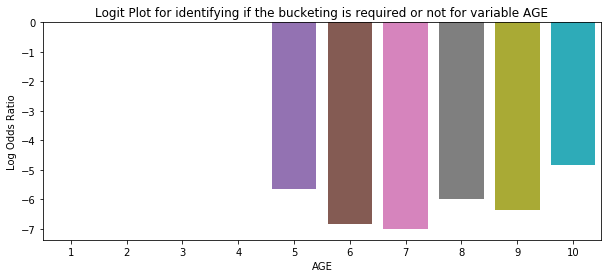

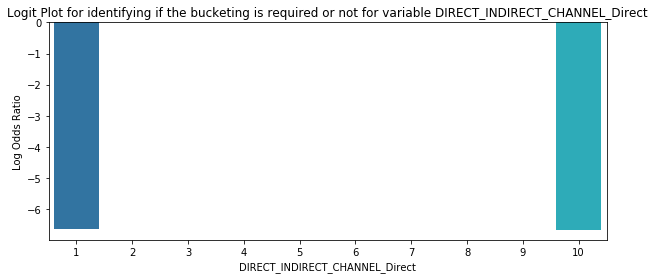

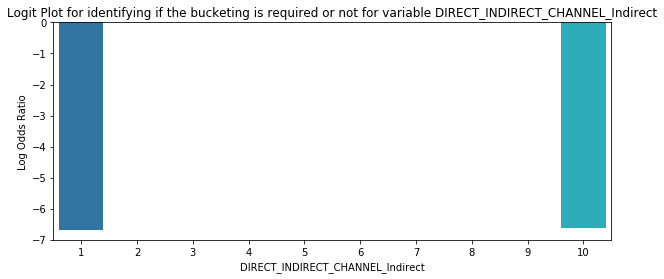

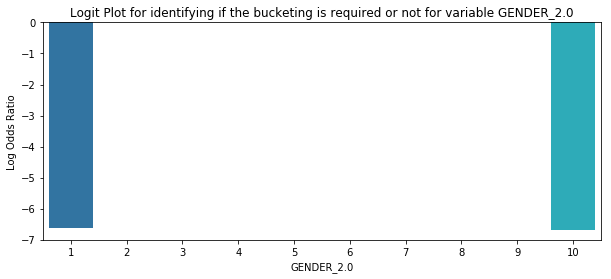

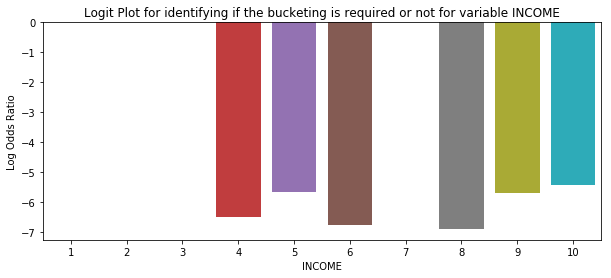

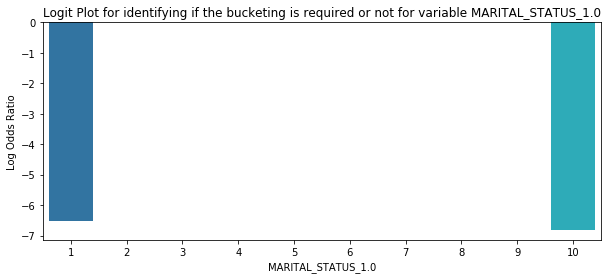

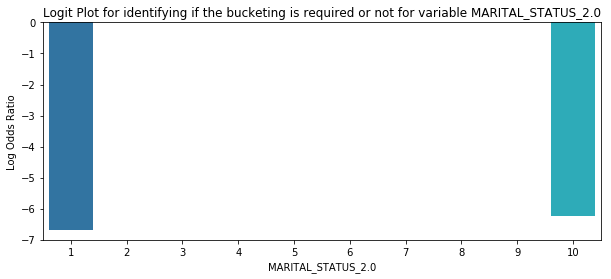

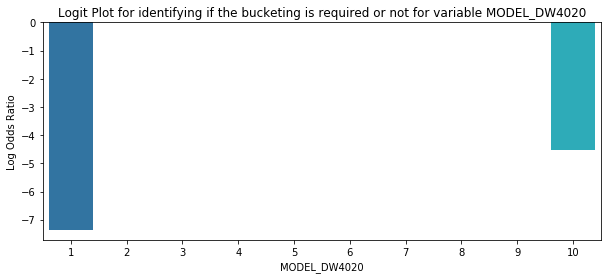

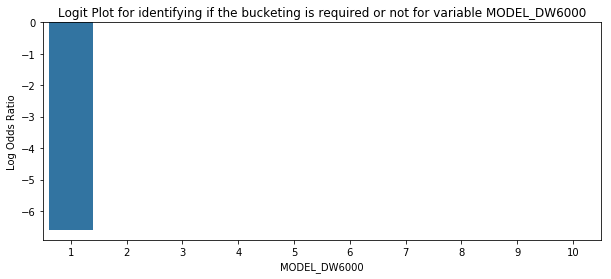

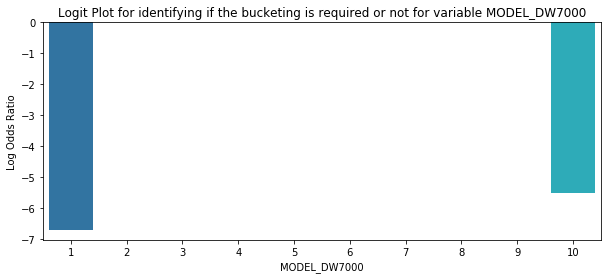

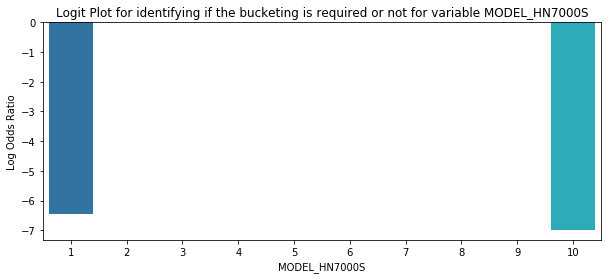

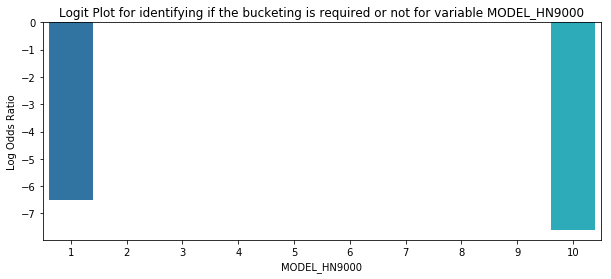

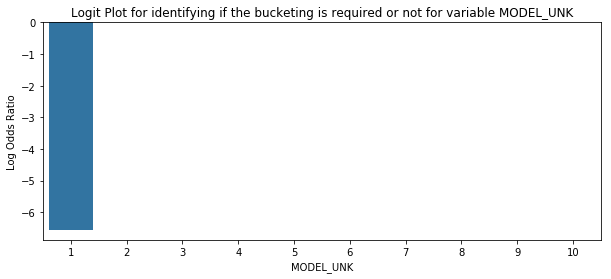

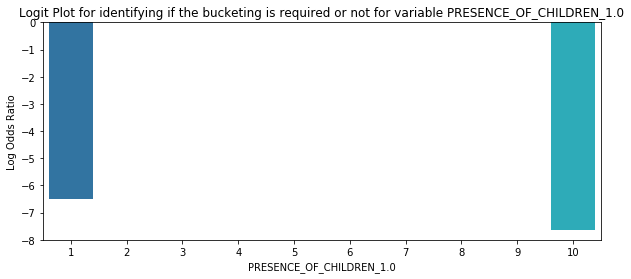

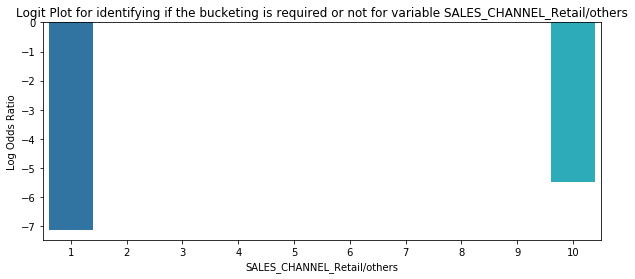

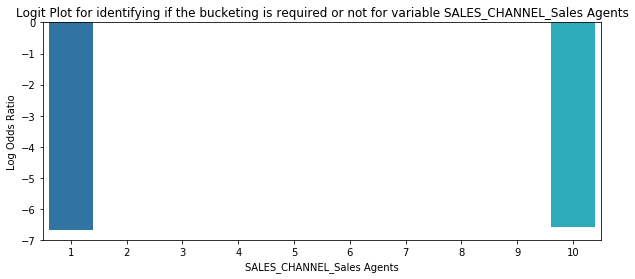

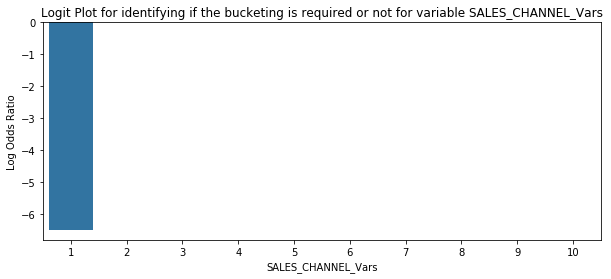

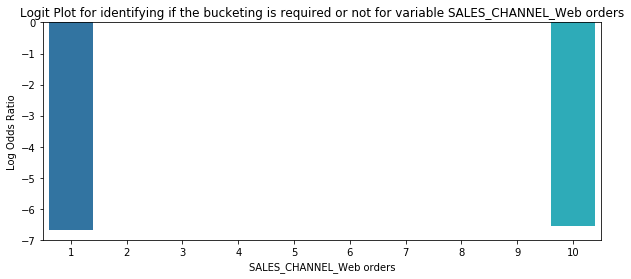

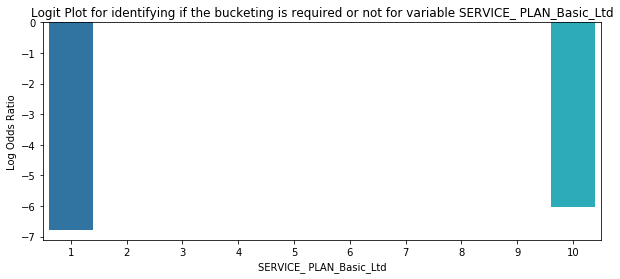

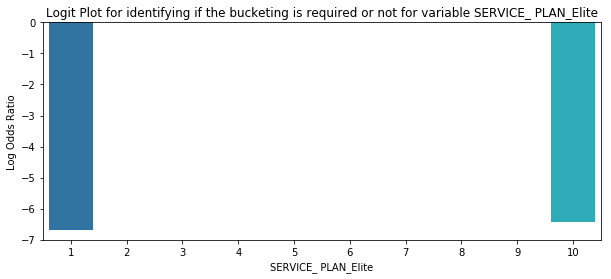

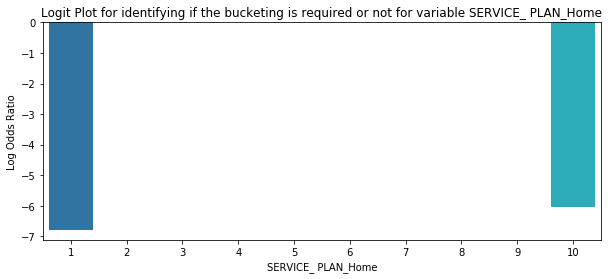

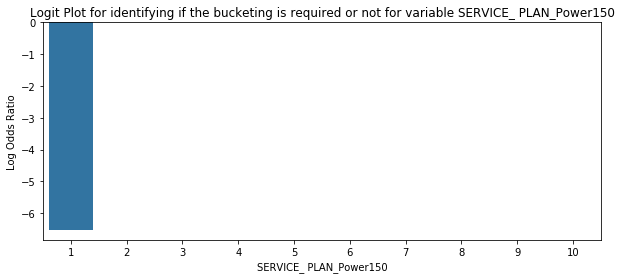

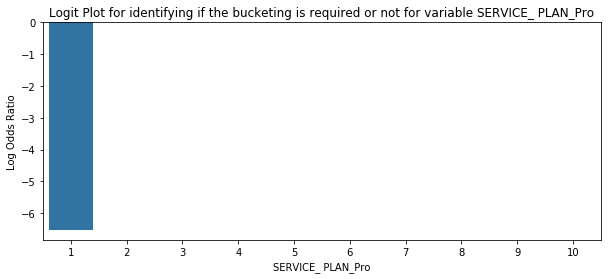

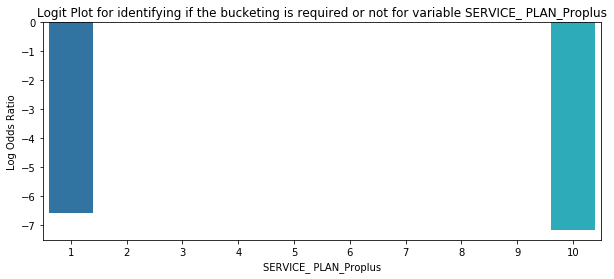

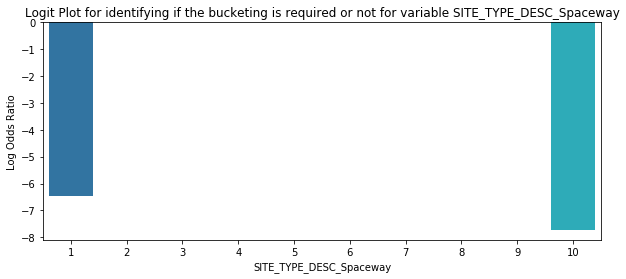

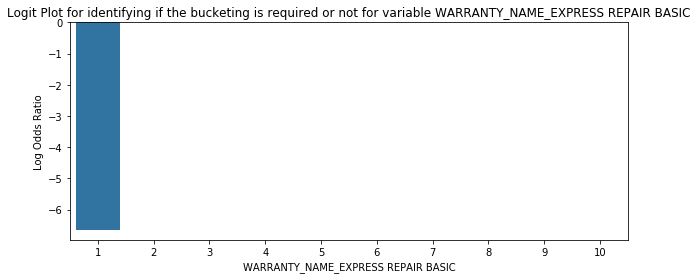

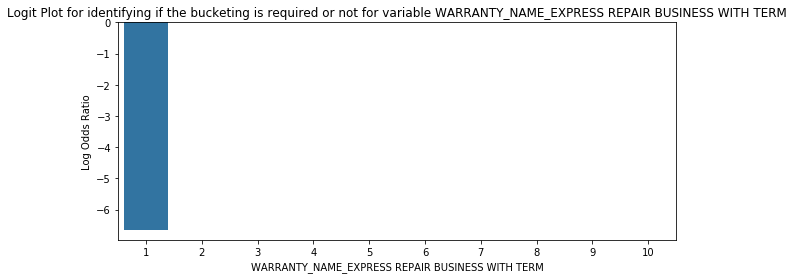

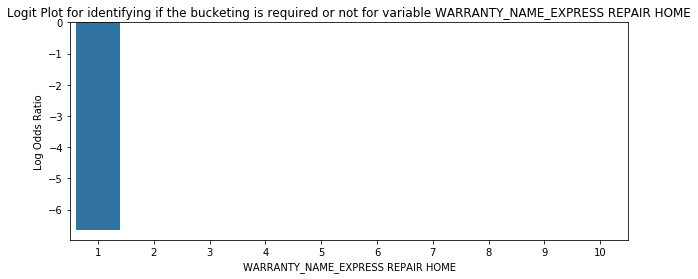

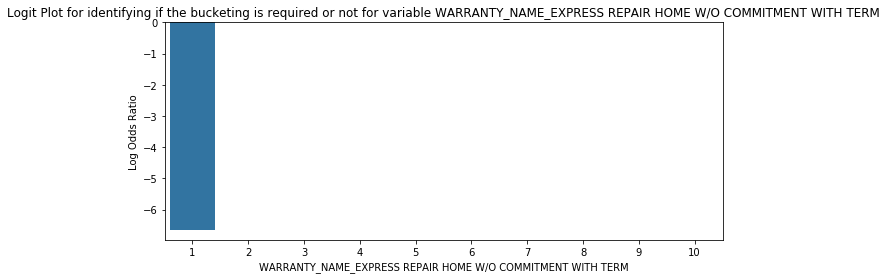

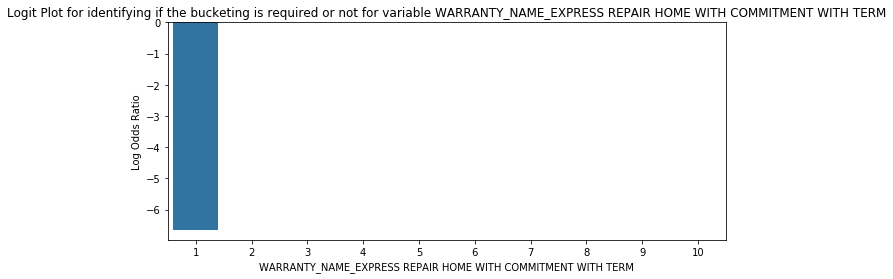

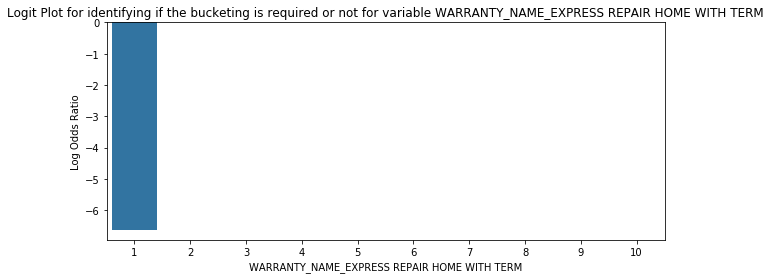

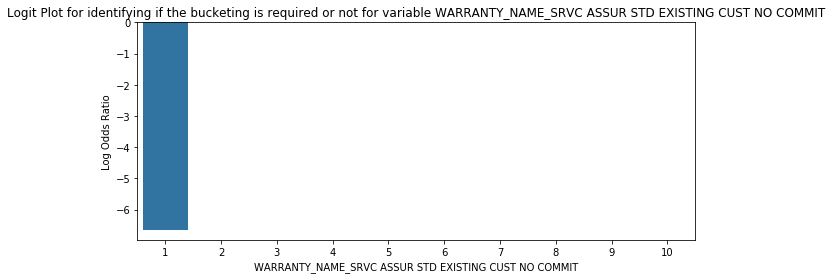

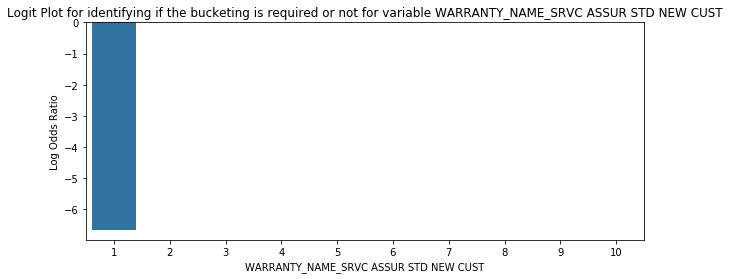

In [86]:
bp = PdfPages('WOE Plots.pdf')

for num_variable in data_new.columns.difference(['ACCOUNT_STATUS_Inactive']):
    binned = pd.cut(data_new[num_variable], bins=10, labels=list(range(1,11)))
    #binned = binned.dropna()
    odds = data_new.groupby(binned)['ACCOUNT_STATUS_Inactive'].sum() / (data_new.groupby(binned)['ACCOUNT_STATUS_Inactive'].count()-data_new.groupby(binned)['ACCOUNT_STATUS_Inactive'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()

In [106]:
data_new.columns= [var.strip().replace('-', '_') for var in data_new.columns]
data_new.columns= [var.strip().replace('.', '_') for var in data_new.columns]
data_new.columns= [var.strip().replace('/', '_') for var in data_new.columns]
data_new.columns= [var.strip().replace(' ', '_') for var in data_new.columns]
data_new.columns

Index(['AGE', 'INCOME', 'ACCOUNT_STATUS_Inactive', 'SERVICE__PLAN_Basic_Ltd',
       'SERVICE__PLAN_Elite', 'SERVICE__PLAN_Home', 'SERVICE__PLAN_Power150',
       'SERVICE__PLAN_Pro', 'SERVICE__PLAN_Proplus', 'MODEL_DW4020',
       'MODEL_DW6000', 'MODEL_DW7000', 'MODEL_HN7000S', 'MODEL_HN9000',
       'MODEL_UNK', 'SALES_CHANNEL_Retail_others',
       'SALES_CHANNEL_Sales_Agents', 'SALES_CHANNEL_Vars',
       'SALES_CHANNEL_Web_orders', 'DIRECT_INDIRECT_CHANNEL_Direct',
       'DIRECT_INDIRECT_CHANNEL_Indirect', 'SITE_TYPE_DESC_Spaceway',
       'WARRANTY_NAME_EXPRESS_REPAIR_BASIC',
       'WARRANTY_NAME_EXPRESS_REPAIR_BUSINESS_WITH_TERM',
       'WARRANTY_NAME_EXPRESS_REPAIR_HOME',
       'WARRANTY_NAME_EXPRESS_REPAIR_HOME_W_O_COMMITMENT_WITH_TERM',
       'WARRANTY_NAME_EXPRESS_REPAIR_HOME_WITH_COMMITMENT_WITH_TERM',
       'WARRANTY_NAME_EXPRESS_REPAIR_HOME_WITH_TERM',
       'WARRANTY_NAME_SRVC_ASSUR_STD_EXISTING_CUST_NO_COMMIT',
       'WARRANTY_NAME_SRVC_ASSUR_STD_NEW_CUST', 'GE

In [108]:
somersd_df = pd.DataFrame()
for num_variable in data_new.columns.difference(['ACCOUNT_STATUS_Inactive']):
    logreg = sm.logit(formula = str('ACCOUNT_STATUS_Inactive ~ ')+str(num_variable), data=data_new)
    result = logreg.fit()
    y_score = pd.DataFrame(result.predict())
    y_score.columns = ['Score']
    somers_d = 2*metrics.roc_auc_score(data_new['ACCOUNT_STATUS_Inactive'],y_score) - 1
    temp = pd.DataFrame([num_variable,somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

Optimization terminated successfully.
         Current function value: 0.009596
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.009939
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.009939
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.009939
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.009705
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.009927
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.009932
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.008884
         Iterations 11
         Current function value: 0.009870
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.009892
         Iterations 11
Optimiz

C:\Users\ASHISH\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.009864
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.009805
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.009859
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.009566
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.009939
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.009740
         Iterations 27
Optimization terminated successfully.
         Current function value: 0.009938
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.009886
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.009935
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.009883
         Iterations 11
       

C:\Users\ASHISH\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ASHISH\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.009838
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.009933
         Iterations 19
         Current function value: 0.009934
         Iterations: 35
         Current function value: 0.009933
         Iterations: 35


C:\Users\ASHISH\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ASHISH\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.009932
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.009900
         Iterations 26


C:\Users\ASHISH\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.009936
         Iterations: 35
         Current function value: 0.009937
         Iterations: 35


C:\Users\ASHISH\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ASHISH\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.009938
         Iterations: 35


C:\Users\ASHISH\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [109]:
somersd_df.sort_values('SomersD', ascending=False, inplace=True)

In [110]:
somersd_df

,Variable Name,SomersD
0,MODEL_DW4020,0.473571
0,AGE,0.411407
0,SALES_CHANNEL_Retail_others,0.317437
0,INCOME,0.284514
0,SITE_TYPE_DESC_Spaceway,0.14659
0,SALES_CHANNEL_Vars,0.142299
0,PRESENCE_OF_CHILDREN_1_0,0.127363
0,SERVICE__PLAN_Power150,0.124975
0,MODEL_HN7000S,0.122109
0,MODEL_HN9000,0.121755


In [ ]:
#VIF assessment

In [107]:
X = pd.concat([data_new[data_new.columns.difference(['ACCOUNT_STATUS_Inactive'])],data_new['ACCOUNT_STATUS_Inactive']], axis=1)
features = "+".join(data_new.columns.difference(['ACCOUNT_STATUS_Inactive']))
X.head()

,AGE,DIRECT_INDIRECT_CHANNEL_Direct,DIRECT_INDIRECT_CHANNEL_Indirect,GENDER_2_0,INCOME,MARITAL_STATUS_1_0,MARITAL_STATUS_2_0,MODEL_DW4020,MODEL_DW6000,MODEL_DW7000,...,SITE_TYPE_DESC_Spaceway,WARRANTY_NAME_EXPRESS_REPAIR_BASIC,WARRANTY_NAME_EXPRESS_REPAIR_BUSINESS_WITH_TERM,WARRANTY_NAME_EXPRESS_REPAIR_HOME,WARRANTY_NAME_EXPRESS_REPAIR_HOME_WITH_COMMITMENT_WITH_TERM,WARRANTY_NAME_EXPRESS_REPAIR_HOME_WITH_TERM,WARRANTY_NAME_EXPRESS_REPAIR_HOME_W_O_COMMITMENT_WITH_TERM,WARRANTY_NAME_SRVC_ASSUR_STD_EXISTING_CUST_NO_COMMIT,WARRANTY_NAME_SRVC_ASSUR_STD_NEW_CUST,ACCOUNT_STATUS_Inactive
0,66.0,0,1,1,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43.0,0,1,1,4.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,58.0,0,1,1,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23.0,1,0,0,6.0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,36.0,0,1,0,7.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
features

'AGE+DIRECT_INDIRECT_CHANNEL_Direct+DIRECT_INDIRECT_CHANNEL_Indirect+GENDER_2_0+INCOME+MARITAL_STATUS_1_0+MARITAL_STATUS_2_0+MODEL_DW4020+MODEL_DW6000+MODEL_DW7000+MODEL_HN7000S+MODEL_HN9000+MODEL_UNK+PRESENCE_OF_CHILDREN_1_0+SALES_CHANNEL_Retail_others+SALES_CHANNEL_Sales_Agents+SALES_CHANNEL_Vars+SALES_CHANNEL_Web_orders+SERVICE__PLAN_Basic_Ltd+SERVICE__PLAN_Elite+SERVICE__PLAN_Home+SERVICE__PLAN_Power150+SERVICE__PLAN_Pro+SERVICE__PLAN_Proplus+SITE_TYPE_DESC_Spaceway+WARRANTY_NAME_EXPRESS_REPAIR_BASIC+WARRANTY_NAME_EXPRESS_REPAIR_BUSINESS_WITH_TERM+WARRANTY_NAME_EXPRESS_REPAIR_HOME+WARRANTY_NAME_EXPRESS_REPAIR_HOME_WITH_COMMITMENT_WITH_TERM+WARRANTY_NAME_EXPRESS_REPAIR_HOME_WITH_TERM+WARRANTY_NAME_EXPRESS_REPAIR_HOME_W_O_COMMITMENT_WITH_TERM+WARRANTY_NAME_SRVC_ASSUR_STD_EXISTING_CUST_NO_COMMIT+WARRANTY_NAME_SRVC_ASSUR_STD_NEW_CUST'

In [112]:
a,b = dmatrices(formula_like='ACCOUNT_STATUS_Inactive ~ '+ str(features), data = data_new, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

print(vif)

    VIF Factor                                           features
0   212.845771                                          Intercept
1     1.129772                                                AGE
2    33.875251                     DIRECT_INDIRECT_CHANNEL_Direct
3    33.854241                   DIRECT_INDIRECT_CHANNEL_Indirect
4     1.043168                                         GENDER_2_0
5     1.006374                                             INCOME
6     1.380652                                 MARITAL_STATUS_1_0
7     1.075126                                 MARITAL_STATUS_2_0
8     1.412653                                       MODEL_DW4020
9     1.326107                                       MODEL_DW6000
10    1.167895                                       MODEL_DW7000
11    2.517415                                      MODEL_HN7000S
12    2.032974                                       MODEL_HN9000
13    1.603995                                          MODEL_UNK
14    1.27

In [113]:
# final list of variables selected for model building
selected_features = data_new.columns.difference([' DIRECT_INDIRECT_CHANNEL_Direct',' DIRECT_INDIRECT_CHANNEL_Indirect','ACCOUNT_STATUS_Inactive'])

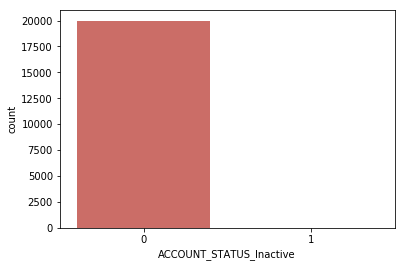

In [37]:
sns.countplot(x='ACCOUNT_STATUS_Inactive',data=data_new, palette='hls')
plt.show()

In [114]:
data_new.ACCOUNT_STATUS_Inactive.value_counts()

0    19972
1       26
Name: ACCOUNT_STATUS_Inactive, dtype: int64

In [115]:
from sklearn.model_selection import train_test_split

X = data_new[selected_features]
y = data_new['ACCOUNT_STATUS_Inactive']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [116]:
import imblearn.over_sampling as os

In [117]:
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter

In [118]:
ros = RandomOverSampler(random_state=500)
X_res_train, y_res_train = ros.fit_sample(train_X, train_y)
print('Original dataset shape {}'.format(Counter(train_y)))
print('Resampled dataset shape {}'.format(Counter(y_res_train)))

Original dataset shape Counter({0: 13978, 1: 20})
Resampled dataset shape Counter({0: 13978, 1: 13978})


In [173]:
from sklearn.ensemble import RandomForestClassifier

radm_clf = RandomForestClassifier(oob_score=True,n_estimators=60 , max_features=8, n_jobs=-1,max_depth=6)
radm_clf.fit( X_res_train, y_res_train )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [174]:
radm_train_pred = pd.DataFrame( { 'actual':  y_res_train,
                            'predicted': radm_clf.predict( X_res_train ) } )

metrics.accuracy_score( radm_train_pred.actual, radm_train_pred.predicted )

0.9767134067820862

In [145]:
ros1 = RandomOverSampler(random_state=500)
X_res_test, y_res_test = ros1.fit_sample(test_X, test_y)
print('Original dataset shape {}'.format(Counter(test_y)))
print('Resampled dataset shape {}'.format(Counter(y_res_test)))

Original dataset shape Counter({0: 5994, 1: 6})
Resampled dataset shape Counter({0: 5994, 1: 5994})


In [175]:
radm_test_pred = pd.DataFrame( { 'actual':  y_res_test,
                            'predicted': radm_clf.predict( X_res_test ) } )

metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )

0.9780613947280614

In [155]:
pargrid_ada = {'n_estimators': [50, 60, 70, 80],
                'max_features': [5,6,7,8],
                 'max_depth' : [3,4,5,6]}

from sklearn.model_selection import GridSearchCV
gscv_Rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [156]:
gscv_results = gscv_Rf.fit(X_res_train, y_res_train)
gscv_results.best_score_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  4.8min finished


0.9791100300472171

In [157]:
gscv_results.best_params_

{'max_depth': 6, 'max_features': 8, 'n_estimators': 70}

In [176]:
radm_test_pred1 = pd.DataFrame( { 'actual':   y_res_test,
                            'predicted': gscv_results.predict(X_res_test ) } )

metrics.accuracy_score( radm_test_pred1.actual, radm_test_pred1.predicted )

0.979396062729396

In [196]:
auc = (metrics.roc_auc_score(y_res_test, gscv_results.predict(X_res_test))*100).round(2)
print("AUC : {} %.".format(auc))

AUC : 97.94 %.


In [197]:
auc1 = (metrics.roc_auc_score(y_res_train, gscv_results.predict(X_res_train))*100).round(2)
print("AUC : {} %.".format(auc1))

AUC : 97.67 %.


In [198]:
print(classification_report(y_res_train,gscv_results.predict(X_res_train)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     13978
           1       0.96      1.00      0.98     13978

   micro avg       0.98      0.98      0.98     27956
   macro avg       0.98      0.98      0.98     27956
weighted avg       0.98      0.98      0.98     27956



In [199]:
print(classification_report(y_res_test,gscv_results.predict(X_res_test)))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      5994
           1       0.96      1.00      0.98      5994

   micro avg       0.98      0.98      0.98     11988
   macro avg       0.98      0.98      0.98     11988
weighted avg       0.98      0.98      0.98     11988



In [ ]:
 # what do we understand by recall?

In [ ]:
#############     end  #########

In [43]:
import sklearn
print(dir(sklearn))

['__SKLEARN_SETUP__', '__all__', '__builtins__', '__cached__', '__check_build', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', 'base', 'clone', 'config_context', 'ensemble', 'exceptions', 'externals', 'feature_selection', 'get_config', 'linear_model', 'logger', 'logging', 'metrics', 'model_selection', 'neighbors', 'preprocessing', 'random_projection', 're', 'set_config', 'setup_module', 'show_versions', 'svm', 'sys', 'tree', 'utils', 'warnings']


In [ ]:
#xgboost

In [1]:
#from xgboost import XGBClassifier

In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [76]:
nb_clf = GaussianNB()
nb_clf.fit(X_res_train, y_res_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [78]:
nb_cm = metrics.confusion_matrix(y_res_test,nb_clf.predict( X_res_test ) )

In [79]:
nb_cm

array([[2878, 3116],
       [   0, 5994]], dtype=int64)

In [80]:
metrics.accuracy_score( y_res_test, nb_clf.predict( X_res_test ) )

0.7400734067400734

In [ ]:
#svc

In [2]:
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline


ImportError: cannot import name 'RandomizedPCA' from 'sklearn.decomposition' (C:\Users\ASHISH\Anaconda3\lib\site-packages\sklearn\decomposition\__init__.py)

In [6]:
from sklearn.decomposition import RandomizedPCA

ImportError: cannot import name 'RandomizedPCA' from 'sklearn.decomposition' (C:\Users\ASHISH\Anaconda3\lib\site-packages\sklearn\decomposition\__init__.py)

In [66]:
import sklearn
from sklearn.grid_search import GridSearchCV

ModuleNotFoundError: No module named 'sklearn.grid_search'